<a href="https://colab.research.google.com/github/AshishShinde03/ML/blob/main/OBV_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Importing Packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import yfinance as yf
from datetime import*
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm

In [6]:
ticker = 'panw'
start = '1926-07-01'
end = '2023-01-31'

In [7]:
df_pawn = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [8]:
df_pawn = df_pawn.reset_index(0).reset_index(drop=True)

In [9]:
df_pawn

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-07-20,18.383333,20.690001,17.700001,17.709999,17.709999,21048300
1,2012-07-23,17.533333,18.000000,17.033333,17.170000,17.170000,2365200
2,2012-07-24,17.333332,18.666668,17.173332,18.500000,18.500000,2150400
3,2012-07-25,18.833332,19.666668,18.433332,19.650000,19.650000,1799100
4,2012-07-26,19.926666,20.616667,19.360001,19.959999,19.959999,1283400
...,...,...,...,...,...,...,...
2644,2023-01-24,150.809998,152.160004,149.389999,151.139999,151.139999,5180500
2645,2023-01-25,148.000000,152.190002,146.949997,151.779999,151.779999,6491500
2646,2023-01-26,154.779999,159.979996,153.679993,159.110001,159.110001,6782500
2647,2023-01-27,158.000000,161.229996,157.600006,159.779999,159.779999,4171700


In [10]:
ff_data = pd.read_csv(r'https://raw.githubusercontent.com/AshishShinde03/ML/main/F-F_Research_Data_Factors_daily.CSV')

In [11]:
ff_data

,SrNo,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.25,-0.27,0.009
1,19260702,0.45,-0.33,-0.06,0.009
2,19260706,0.17,0.30,-0.39,0.009
3,19260707,0.09,-0.58,0.02,0.009
4,19260708,0.21,-0.38,0.19,0.009
...,...,...,...,...,...
25414,20230125,0.00,-0.04,0.65,0.017
25415,20230126,1.08,-0.58,0.01,0.017
25416,20230127,0.36,0.62,-1.16,0.017
25417,20230130,-1.38,-0.10,0.72,0.017


In [12]:
ff_data['Date1'] = ff_data['SrNo'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d').strftime('%Y-%m-%d'))

In [13]:
ff_data

,SrNo,Mkt-RF,SMB,HML,RF,Date1
0,19260701,0.10,-0.25,-0.27,0.009,1926-07-01
1,19260702,0.45,-0.33,-0.06,0.009,1926-07-02
2,19260706,0.17,0.30,-0.39,0.009,1926-07-06
3,19260707,0.09,-0.58,0.02,0.009,1926-07-07
4,19260708,0.21,-0.38,0.19,0.009,1926-07-08
...,...,...,...,...,...,...
25414,20230125,0.00,-0.04,0.65,0.017,2023-01-25
25415,20230126,1.08,-0.58,0.01,0.017,2023-01-26
25416,20230127,0.36,0.62,-1.16,0.017,2023-01-27
25417,20230130,-1.38,-0.10,0.72,0.017,2023-01-30


In [14]:
ff_data['Date'] = pd.to_datetime(ff_data['SrNo'], format='%Y%m%d')

In [15]:
ff_data

,SrNo,Mkt-RF,SMB,HML,RF,Date1,Date
0,19260701,0.10,-0.25,-0.27,0.009,1926-07-01,1926-07-01
1,19260702,0.45,-0.33,-0.06,0.009,1926-07-02,1926-07-02
2,19260706,0.17,0.30,-0.39,0.009,1926-07-06,1926-07-06
3,19260707,0.09,-0.58,0.02,0.009,1926-07-07,1926-07-07
4,19260708,0.21,-0.38,0.19,0.009,1926-07-08,1926-07-08
...,...,...,...,...,...,...,...
25414,20230125,0.00,-0.04,0.65,0.017,2023-01-25,2023-01-25
25415,20230126,1.08,-0.58,0.01,0.017,2023-01-26,2023-01-26
25416,20230127,0.36,0.62,-1.16,0.017,2023-01-27,2023-01-27
25417,20230130,-1.38,-0.10,0.72,0.017,2023-01-30,2023-01-30


In [16]:
ff_data = ff_data.set_index('Date')

In [17]:
start_date = pd.to_datetime('2012-07-20')
end_date = pd.to_datetime('2023-01-30')
ff_data = ff_data[(ff_data.index >= start_date) & (ff_data.index <= end_date)]

In [18]:
ff_data

,SrNo,Mkt-RF,SMB,HML,RF,Date1
Date,,,,,,
2012-07-20,20120720,-1.06,-0.36,0.08,0.000,2012-07-20
2012-07-23,20120723,-1.02,-0.68,0.19,0.000,2012-07-23
2012-07-24,20120724,-0.99,-0.57,0.30,0.000,2012-07-24
2012-07-25,20120725,-0.01,0.27,0.00,0.000,2012-07-25
2012-07-26,20120726,1.53,-0.89,0.34,0.000,2012-07-26
...,...,...,...,...,...,...
2023-01-24,20230124,-0.16,-0.23,0.19,0.017,2023-01-24
2023-01-25,20230125,0.00,-0.04,0.65,0.017,2023-01-25
2023-01-26,20230126,1.08,-0.58,0.01,0.017,2023-01-26


In [19]:
ff_data = ff_data.drop([ 'Date1'], axis=1)

In [20]:
ff_data


,SrNo,Mkt-RF,SMB,HML,RF
Date,,,,,
2012-07-20,20120720,-1.06,-0.36,0.08,0.000
2012-07-23,20120723,-1.02,-0.68,0.19,0.000
2012-07-24,20120724,-0.99,-0.57,0.30,0.000
2012-07-25,20120725,-0.01,0.27,0.00,0.000
2012-07-26,20120726,1.53,-0.89,0.34,0.000
...,...,...,...,...,...
2023-01-24,20230124,-0.16,-0.23,0.19,0.017
2023-01-25,20230125,0.00,-0.04,0.65,0.017
2023-01-26,20230126,1.08,-0.58,0.01,0.017


In [21]:
merged_df = pd.merge(ff_data, df_pawn, on='Date', how='inner')

In [22]:
merged_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume
0,2012-07-20,20120720,-1.06,-0.36,0.08,0.000,18.383333,20.690001,17.700001,17.709999,17.709999,21048300
1,2012-07-23,20120723,-1.02,-0.68,0.19,0.000,17.533333,18.000000,17.033333,17.170000,17.170000,2365200
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,17.333332,18.666668,17.173332,18.500000,18.500000,2150400
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400
...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700


In [27]:
merged_OBV_df = merged_df

In [28]:
merged_OBV_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume
0,2012-07-20,20120720,-1.06,-0.36,0.08,0.000,18.383333,20.690001,17.700001,17.709999,17.709999,21048300
1,2012-07-23,20120723,-1.02,-0.68,0.19,0.000,17.533333,18.000000,17.033333,17.170000,17.170000,2365200
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,17.333332,18.666668,17.173332,18.500000,18.500000,2150400
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400
...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700


## 𝑌𝑡 = 𝛼0 + 𝛼1𝑌𝑡 ― 1 + 𝛼2𝑂𝐵𝑉𝑡 ― 1 + 𝜀𝑡

In [30]:
merged_OBV_df = merged_OBV_df.iloc[1:]

In [31]:
merged_OBV_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume
1,2012-07-23,20120723,-1.02,-0.68,0.19,0.000,17.533333,18.000000,17.033333,17.170000,17.170000,2365200
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,17.333332,18.666668,17.173332,18.500000,18.500000,2150400
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400
5,2012-07-27,20120727,1.96,0.55,0.07,0.000,20.293333,20.293333,19.000000,19.000000,19.000000,460200
...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700


In [32]:
# Calculate the On-Balance Volume (OBV) indicator
# OBV is a technical indicator used to measure buying and selling pressure on an asset by using volume flow.


# here we are checking if the current day's closing price is greater or lesser than the previous day's closing price
# then the first function returns  the volume of shares traded for the day if the current day's closing price is greater than the previous day's closing price 
# and the second function returns the negative volume of shares traded for the day if the current day's closing price is less than the previous day's closing price
# And then we are calculating the cumulative sume i.e. running total of the positive and negative volume values
# If the closing price is increasing over time, the positive volume values will dominate and the OBV will increase. 
# If the closing price is decreasing over time, the negative volume values will dominate and the OBV will decrease

merged_OBV_df['OBV'] = np.where(merged_OBV_df['Close'] > merged_OBV_df['Close'].shift(1), merged_OBV_df['Volume'], 
                       np.where(merged_OBV_df['Close'] < merged_OBV_df['Close'].shift(1), -merged_OBV_df['Volume'], 0)).cumsum()

<ipython-input-32-b5fa6d114526>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_OBV_df['OBV'] = np.where(merged_OBV_df['Close'] > merged_OBV_df['Close'].shift(1), merged_OBV_df['Volume'],


In [33]:
merged_OBV_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume,OBV
1,2012-07-23,20120723,-1.02,-0.68,0.19,0.000,17.533333,18.000000,17.033333,17.170000,17.170000,2365200,0
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,17.333332,18.666668,17.173332,18.500000,18.500000,2150400,2150400
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,3949500
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,5232900
5,2012-07-27,20120727,1.96,0.55,0.07,0.000,20.293333,20.293333,19.000000,19.000000,19.000000,460200,4772700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,625029200
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,631520700
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,638303200
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,642474900


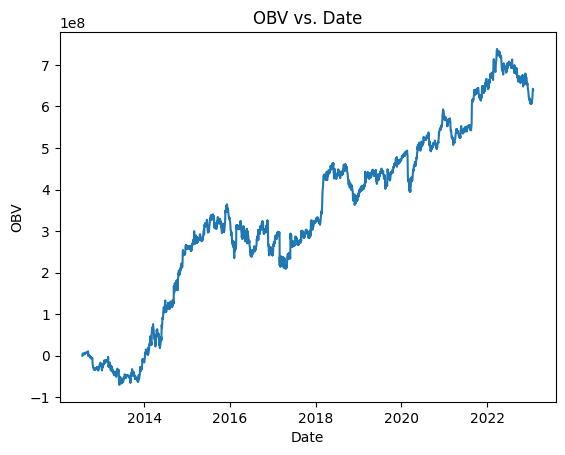

In [35]:
plt.plot(merged_OBV_df['Date'], merged_OBV_df['OBV'])
plt.title('OBV vs. Date')
plt.xlabel('Date')
plt.ylabel('OBV')
plt.show()


In [37]:
merged_OBV_df = merged_OBV_df.iloc[1:]

In [38]:
merged_OBV_df

,Date,SrNo,Mkt-RF,SMB,HML,RF,Open,High,Low,Close,Adj Close,Volume,OBV
2,2012-07-24,20120724,-0.99,-0.57,0.30,0.000,17.333332,18.666668,17.173332,18.500000,18.500000,2150400,2150400
3,2012-07-25,20120725,-0.01,0.27,0.00,0.000,18.833332,19.666668,18.433332,19.650000,19.650000,1799100,3949500
4,2012-07-26,20120726,1.53,-0.89,0.34,0.000,19.926666,20.616667,19.360001,19.959999,19.959999,1283400,5232900
5,2012-07-27,20120727,1.96,0.55,0.07,0.000,20.293333,20.293333,19.000000,19.000000,19.000000,460200,4772700
6,2012-07-30,20120730,-0.13,-0.41,0.23,0.000,18.953333,18.953333,17.973333,18.333332,18.333332,829200,3943500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2644,2023-01-24,20230124,-0.16,-0.23,0.19,0.017,150.809998,152.160004,149.389999,151.139999,151.139999,5180500,625029200
2645,2023-01-25,20230125,0.00,-0.04,0.65,0.017,148.000000,152.190002,146.949997,151.779999,151.779999,6491500,631520700
2646,2023-01-26,20230126,1.08,-0.58,0.01,0.017,154.779999,159.979996,153.679993,159.110001,159.110001,6782500,638303200
2647,2023-01-27,20230127,0.36,0.62,-1.16,0.017,158.000000,161.229996,157.600006,159.779999,159.779999,4171700,642474900


In [39]:
# Define the dependent and independent variables
y = merged_OBV_df['Close']
X = merged_OBV_df[['Close', 'OBV']].shift(1).dropna()

In [40]:
# Fit the model
X = sm.add_constant(X)
model = sm.OLS(y[1:], X)
results = model.fit()

In [41]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.586e+05
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:07:22   Log-Likelihood:                -5766.4
No. Observations:                2646   AIC:                         1.154e+04
Df Residuals:                    2643   BIC:                         1.156e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0501      0.078      0.645      0.5

In [42]:
# Calculate the lagged values
merged_OBV_df['Yt-1'] = merged_OBV_df['Adj Close'].shift(1)
merged_OBV_df['OBVt-1'] = merged_OBV_df['OBV'].shift(1)

<ipython-input-42-32fa7a0da147>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_OBV_df['Yt-1'] = merged_OBV_df['Adj Close'].shift(1)
<ipython-input-42-32fa7a0da147>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_OBV_df['OBVt-1'] = merged_OBV_df['OBV'].shift(1)


In [44]:
Yt = 0.0501 + 0.9959*merged_OBV_df['Adj Close'].shift(1) + 8.43e-10*merged_OBV_df['OBV'].shift(1)

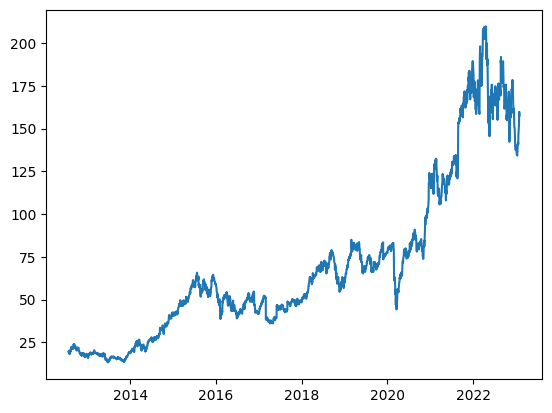

In [45]:
plt.plot(merged_OBV_df['Date'].iloc[1:], merged_OBV_df['Close'].iloc[1:], label='Close')

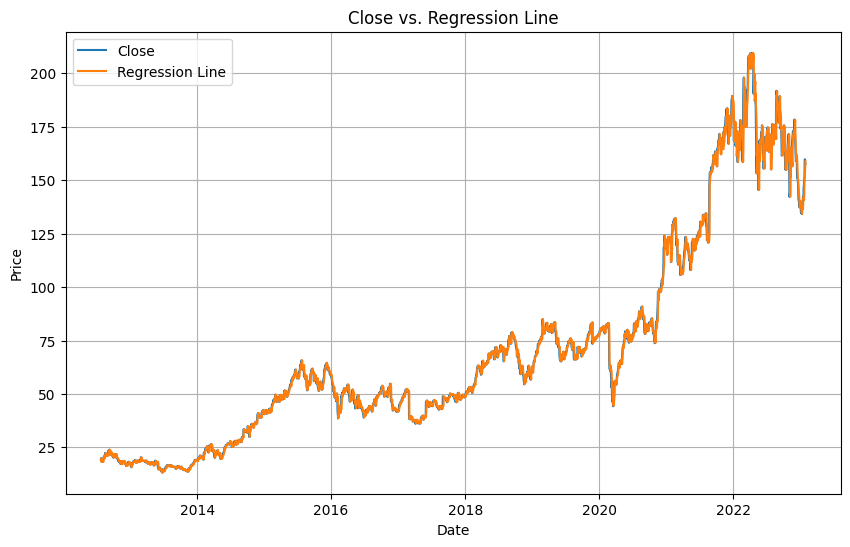

In [46]:
# Plot the data
plt.figure(figsize=(10,6))
plt.plot(merged_OBV_df['Date'].iloc[1:], merged_OBV_df['Close'].iloc[1:], label='Close')

# Plot the regression line
y_pred = results.predict(X)
plt.plot(merged_OBV_df['Date'].iloc[2:], y_pred[:-1], label='Regression Line')

plt.title('Close vs. Regression Line')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.legend(loc='upper left')

plt.show()


In [47]:
import plotly.graph_objects as go

# Plot the data
fig = go.Figure()
fig.add_trace(go.Scatter(x=merged_OBV_df['Date'].iloc[1:], y=merged_OBV_df['Close'].iloc[1:], mode='lines', name='Close'))

# Plot the regression line
y_pred = results.predict(X)
fig.add_trace(go.Scatter(x=merged_OBV_df['Date'].iloc[2:], y=y_pred[:-1], mode='lines', name='Regression Line'))

fig.update_layout(title='Close vs. Regression Line', xaxis_title='Date', yaxis_title='Price', legend=dict(x=0.7, y=0.9))
fig.show()



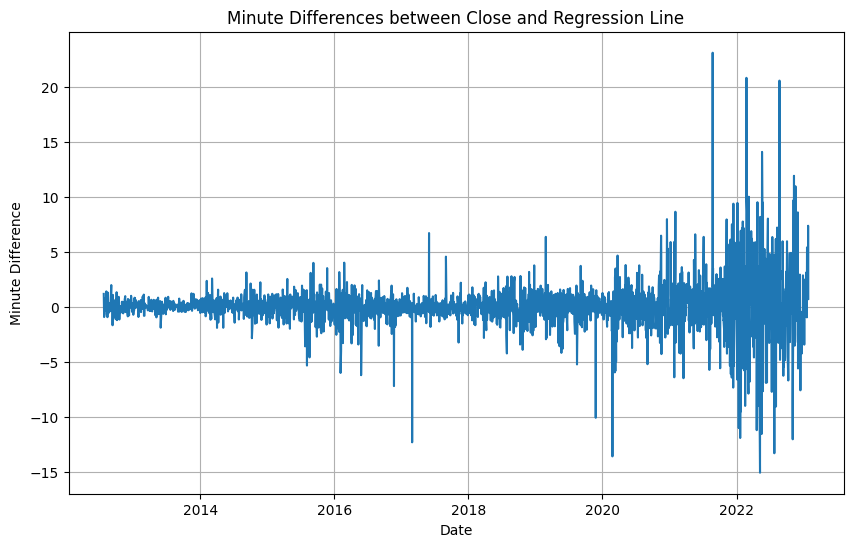

In [48]:
# Get the predicted values of Y from the model
y_pred = results.predict(X)

# Calculate the minute differences between the Close and the Regression Line
minute_diff = merged_OBV_df['Close'].iloc[1:] - y_pred[:-1]

# Plot the minute differences
plt.figure(figsize=(10,6))
plt.plot(merged_OBV_df['Date'].iloc[1:], minute_diff)
plt.title('Minute Differences between Close and Regression Line')
plt.xlabel('Date')
plt.ylabel('Minute Difference')
plt.grid()

plt.show()


In [49]:
# Calculate residuals
residuals = merged_OBV_df['Close'].iloc[1:] - y_pred

# Calculate MSE and RMSE
mse = np.mean(residuals ** 2)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)


MSE: 4.5753038680177776
RMSE: 2.138995995325325


# Augmented AR(1) using ADS Index: 𝑌𝑡 = 𝛼0 + 𝛼1𝑌𝑡 ― 1 + 𝛼2𝐴𝐷𝑆𝑡 ― 1 + 𝜀𝑡

In [ ]:
merged_ADS_df['Y_lag'] = merged_ADS_df['Adj Close'].shift(1)
merged_ADS_df['ADS_lag'] = merged_ADS_df['ADS_Index'].shift(1)
merged_ADS_df['Y_diff'] = merged_ADS_df['Adj Close'].diff()
merged_ADS_df['ADS_diff'] = merged_ADS_df['ADS_Index'].diff()


In [ ]:
merged_ADS_df

In [ ]:
merged_ADS_df = merged_ADS_df.iloc[1:]


In [ ]:
merged_ADS_df

In [ ]:
X = sm.add_constant(X)

In [ ]:
print(Y.index)
print(X.index)


In [ ]:
model = sm.OLS(Y, X)
results = model.fit()

In [ ]:
print(results.summary())
